# Day 4
## 1. 선형회귀분석

### 단순선형회귀분석

In [1]:
# 필요한 패키지 불러오기

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# Sale 데이터 불러오기

data_file = "/content/drive/MyDrive/단기기초통계/Day4/data/Sales.csv"
Sales = pd.read_csv(data_file)
Sales.iloc[0:5]

,Company,Adver,Sales
0,1,11,23
1,2,19,32
2,3,23,36
3,4,26,46
4,5,56,93


In [3]:
# 단순선형회귀분석 적합
SalesFit = smf.ols(formula='Sales~Adver', data=Sales).fit()
print(SalesFit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     455.5
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.14e-09
Time:                        06:34:21   Log-Likelihood:                -32.059
No. Observations:                  12   AIC:                             68.12
Df Residuals:                      10   BIC:                             69.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2848      2.889      1.137      0.2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# 적합된 모형을 이용한 적합값 및 신뢰구간
predictions = SalesFit.get_prediction()
predictions.summary_frame(alpha=0.05).round(3).iloc[0:3]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,20.854,2.152,16.058,25.649,11.057,30.650
1,33.631,1.667,29.916,37.346,24.316,42.946
2,40.019,1.457,36.773,43.266,30.881,49.158


## 2. 잔차분석
- 표준화잔차, 잔차도표

In [14]:
Fitted = SalesFit.predict()
Residual = SalesFit.resid
RStandard = SalesFit.resid_pearson

# 잔차, 표준화잔차의 탐색
pd.DataFrame({'Fitted': Fitted, 'Residual': Residual, \
                    'RStandard': RStandard}).iloc[0:5]

,Fitted,Residual,RStandard
0,20.853505,2.146495,0.559896
1,33.630747,-1.630747,-0.425367
2,40.019368,-4.019368,-1.048420
3,44.810833,1.189167,0.310185
4,92.725489,0.274511,0.071604


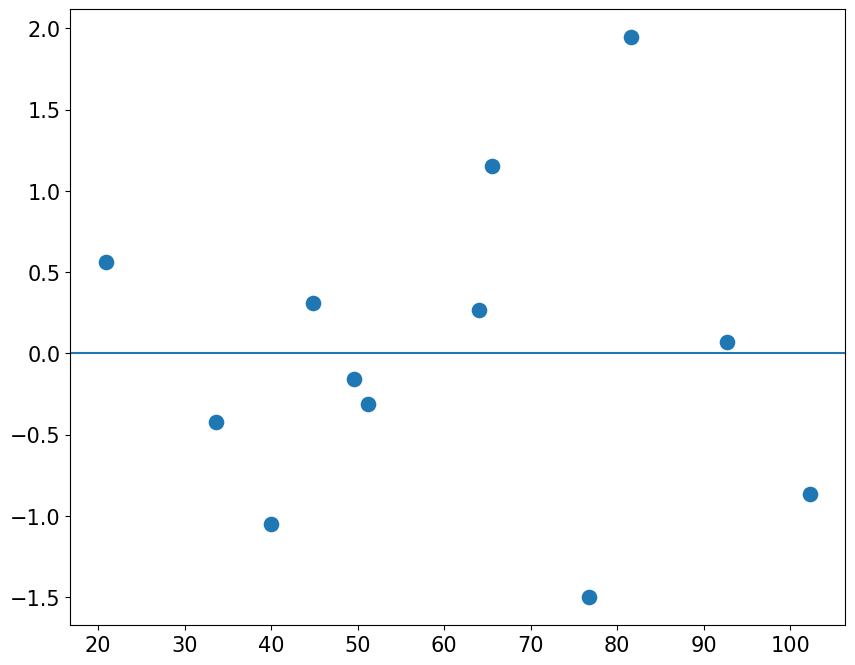

In [15]:
# 잔차 도표
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x=Fitted,y=RStandard, s=150)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.axhline(y=0)

- 정규성 검토

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([-1.50086884, -1.04842015, -0.86297515, -0.42536736, -0.31286804,
         -0.15710484,  0.07160403,  0.26692088,  0.31018475,  0.55989614,
          1.15452596,  1.94447261])),
 (1.014930164527946, 6.532364655292017e-15, 0.9869321023876498))

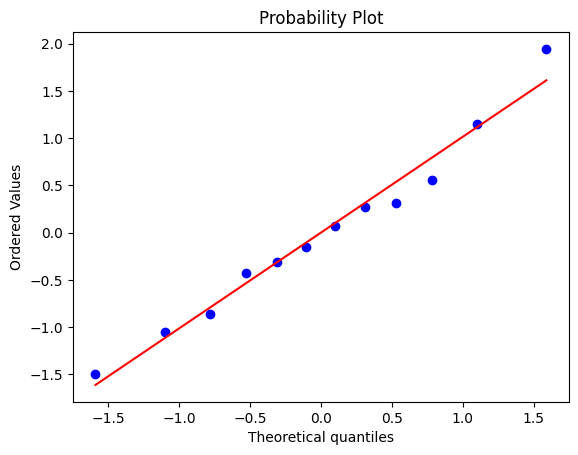

In [16]:
from scipy.stats import probplot

# Q-Q plot
probplot(RStandard, plot=plt)

- 독립성 가정 검토(더빈-왓슨 통계량)

In [17]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(RStandard).round(5)

2.47031

- 더빈-왓슨 통계량의 값은 약 2.470
- 비교적 2에 가까워서 독립성 가정에 큰 문제가 없음

### 다중선형회귀분석

In [5]:
# Satisfaction 데이터 불러오기

data_file = "/content/drive/MyDrive/단기기초통계/Day4/data/Satisfaction.csv"
Satisfaction = pd.read_csv(data_file)

# 500개, 200개의 두 데이터셋으로 나누어 하나는 훈련 자료, 하나는 시험 자료로 사용
Tr_Sat = Satisfaction.iloc[1:500,:]
Ts_Sat = Satisfaction.iloc[500:700,:]

In [6]:
Tr_Sat

,Y,X1,X2,X3,X4,Gender,Age
1,5,5,5,5,5,1,5
2,5,5,6,5,5,2,5
3,5,6,6,5,6,1,2
4,5,5,6,5,5,1,5
5,9,5,5,5,5,2,5
...,...,...,...,...,...,...,...
495,6,6,6,6,6,1,5
496,4,6,5,4,4,2,1
497,5,6,5,5,5,2,1
498,4,5,5,5,4,2,1


In [7]:
Ts_Sat

,Y,X1,X2,X3,X4,Gender,Age
500,5,5,5,5,6,2,2
501,5,4,4,5,6,2,3
502,3,6,6,6,6,2,3
503,4,4,5,5,3,2,4
504,5,5,5,6,6,2,5
...,...,...,...,...,...,...,...
695,3,4,5,6,4,1,5
696,4,3,3,3,5,2,3
697,5,6,6,5,6,2,3
698,5,5,4,5,6,1,4


In [8]:
# 모형적합하기 1
## Age, Gender는 범주형 변수 취급

SatFit = smf.ols(formula='Y~X1+X2+X3+X4+C(Age)+ \
                 C(Gender)', data=Tr_Sat).fit()

In [9]:
# 적합 모형의 전체 정보
print(SatFit.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     10.38
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           9.78e-15
Time:                        06:38:59   Log-Likelihood:                -783.24
No. Observations:                 499   AIC:                             1586.
Df Residuals:                     489   BIC:                             1629.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6812      0.424      3.

In [10]:
# 적합 모형의 추정 계수 정보만 따로 추출
print(SatFit.params.round(5))

Intercept         1.68115
C(Age)[T.2]      -0.27592
C(Age)[T.3]      -0.33035
C(Age)[T.4]      -0.13041
C(Age)[T.5]      -0.06705
C(Gender)[T.2]    0.19021
X1                0.12487
X2                0.05236
X3                0.38463
X4                0.06871
dtype: float64


In [11]:
# 모형적합하기 2
## Treatment(reference) 사용

SatFit2 = smf.ols(formula='Y~X1+X2+X3+X4+\
                 C(Age, Treatment(reference=5))+ \
                 C(Gender, Treatment(reference=2))', \
                  data=Tr_Sat).fit()

In [12]:
print(SatFit2.params.round(5))

Intercept                                 1.80431
C(Age, Treatment(reference=5))[T.1]       0.06705
C(Age, Treatment(reference=5))[T.2]      -0.20886
C(Age, Treatment(reference=5))[T.3]      -0.26329
C(Age, Treatment(reference=5))[T.4]      -0.06335
C(Gender, Treatment(reference=2))[T.1]   -0.19021
X1                                        0.12487
X2                                        0.05236
X3                                        0.38463
X4                                        0.06871
dtype: float64


In [13]:
# 예측해보기
predictions = SatFit.get_prediction(Ts_Sat)
predictions.summary_frame(alpha=0.05).round(3).iloc[0:3]

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.817,0.136,4.549,5.085,2.494,7.140
1,4.585,0.182,4.228,4.943,2.250,6.921
2,5.324,0.146,5.037,5.612,2.999,7.650


## 4. 로지스틱 모형

In [18]:
# 필요한 패키지 불러오기

import os
import numpy as np
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [19]:
# titanic 데이터 불러오기

data_file = "/content/drive/MyDrive/단기기초통계/Day4/data/titanic.txt"
titanic = pd.read_csv(data_file)
print(titanic.shape)
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# 데이터 전처리
## 성별, 나이, 좌석 클래스로 사망 여부를 예측하자
## 성별에서 남성은 0, 여성은 1로 변환
## 나이에서 결측치는 평균값으로 대체
## 좌석 클래스에 대한 가변수 생성 (1,2,3등급이므로 2개의 가변수면 충분)

titanic['Sex'] = titanic['Sex'].map({'female':1,'male':0})
titanic['Age'].fillna(value=titanic['Age'].mean(), inplace=True)
titanic['FirstClass'] = titanic['Pclass'].apply(lambda x: 1 if x == 1 else 0)
titanic['SecondClass'] = titanic['Pclass'].apply(lambda x: 1 if x == 2 else 0)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


In [21]:
# 독립변수와 종속변수 구분

x_titanic = titanic[['Sex', 'Age', 'FirstClass', 'SecondClass']]
y_titanic = titanic['Survived']

In [22]:
# 훈련 자료, 시험 자료 나누기

train_x_titanic, test_x_titanic, train_y_titanic, test_y_titanic = \
train_test_split(x_titanic, y_titanic, test_size=0.3, random_state=123)
print(train_x_titanic.head())
print(test_x_titanic.head())

     Sex   Age  FirstClass  SecondClass
416    1  34.0           0            1
801    1  31.0           0            1
512    0  36.0           1            0
455    0  29.0           0            0
757    0  18.0           0            1
     Sex        Age  FirstClass  SecondClass
172    1   1.000000           0            0
524    0  29.699118           0            0
452    0  30.000000           1            0
170    0  61.000000           1            0
620    0  27.000000           0            0


In [23]:
# 훈련 자료 이용해 로지스틱 모형 적합

logistic = LogisticRegression(penalty='none')
logistic.fit(train_x_titanic, train_y_titanic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [24]:
print(logistic.intercept_)
print(logistic.coef_)

[-1.08777172]
[[ 2.55838407 -0.04004487  2.38223532  1.05157353]]


In [25]:
# 적합된 모형 성능 파악
## 예측 정확도(Accuracy)

print(logistic.score(train_x_titanic, train_y_titanic))
print(logistic.score(test_x_titanic, test_y_titanic))

0.7865168539325843
0.7835820895522388


In [26]:
print(test_x_titanic.head())
print(logistic.predict(test_x_titanic)[0:5])

     Sex        Age  FirstClass  SecondClass
172    1   1.000000           0            0
524    0  29.699118           0            0
452    0  30.000000           1            0
170    0  61.000000           1            0
620    0  27.000000           0            0
[1 0 1 0 0]


In [27]:
## 오차행렬(confusion matrix) 구하기

test_y_prediction = logistic.predict(test_x_titanic)
print(test_y_titanic.sum())
print(test_y_prediction.sum())
confusion_matrix(test_y_titanic, test_y_prediction)

98
108


array([[136,  34],
       [ 24,  74]])

## 5. KNN-Classifier

In [29]:
# 필요한 패키지 불러오기

import os
import numpy as np
import pandas as pd
import collections
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# iris 데이터 불러오기

iris = sns.load_dataset('iris')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
# 독립변수와 종속변수 구분

X = iris[['sepal_length','sepal_width',\
              'petal_length','petal_width']]
y = iris.iloc[:,4]

In [32]:
# 훈련 자료, 시험 자료 나누기

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.3, random_state=123)

In [33]:
# 설명변수 값 표준화

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [34]:
# 최적의 K 찾기 위해 검증 자료 만들기

X_tr_temp, X_val_temp, y_tr_temp, y_val_temp = \
train_test_split(X_train, y_train, test_size = 0.3, random_state=1234)

In [35]:
# 최적의 K 찾기

k_grid = range(1, 21, 1)
acc_list = []

for k_ in k_grid:
    model = KNeighborsClassifier(n_neighbors=k_)
    model.fit(X_tr_temp, y_tr_temp)
    y_pred = model.predict(X_val_temp)
    sub_acc = round((y_pred == y_val_temp).mean(), 2)
    acc_list.append(sub_acc)

KnnRes_df = pd.DataFrame({'k' : k_grid, 'Accuracy' : acc_list})

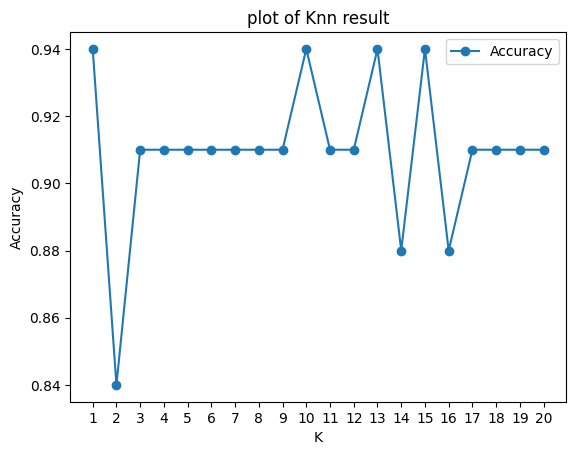

In [36]:
# 정분류율이 제일 높은 K값을 선택

KnnRes_df.plot.line(x ='k', y='Accuracy', style=['-o'], xticks=(list(k_grid)))
plt.title("plot of Knn result")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

In [37]:
# 최적의 K 구하기
KnnoptimalK = KnnRes_df['k'].iloc[KnnRes_df['Accuracy'].idxmax()]
print(KnnoptimalK)

# 모델 적합하기
knn_model = KNeighborsClassifier(n_neighbors=KnnoptimalK)
knn_model.fit(X_train, y_train)

1


KNeighborsClassifier(n_neighbors=1)

In [38]:
# 예측하기
##오차행렬 구하기

y_test_pred_knn = knn_model.predict(X_test)
confusion_matrix(y_test, y_test_pred_knn)

array([[18,  0,  0],
       [ 0,  9,  1],
       [ 0,  2, 15]])

In [39]:
## 정분류율

knn_model.score(X_test, y_test)

0.9333333333333333